<a href="https://colab.research.google.com/github/CyberHnic/Custom-Invention/blob/main/hands_on_session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [34]:
tips_df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv")

In [35]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [36]:
sum_df = tips_df.groupby("day")["total_bill"].sum()
sum_df

day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1096.33
Name: total_bill, dtype: float64

In [37]:
sum_sat = 0
sum_sun = 0

for i in range(len(tips_df)):
  if tips_df.loc[i, "day"] == "Sat":
    sum_sat = sum_sat + tips_df.loc[i, "total_bill"]
  elif tips_df.loc[i, "day"] == "Sun":
    sum_sun = sum_sun + tips_df.loc[i, "total_bill"]

In [38]:
print(sum_sat)
print(sum_sun)

1778.3999999999996
1627.1600000000003


In [39]:
list(range(0,5))

[0, 1, 2, 3, 4]

In [40]:
tips_df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


**Function to aggregate a dataframe**

This functions does this and that

$\sum_{i}D_i$

In [41]:
def groupby_sum(tips_df, group_by_column, target_day, sum_column):
  """
  Function to aggregate a dataframe and sum over a specific column
  :param tips_df: the input data
  :param group_by_column: the column to group by
  """


  sum_day = 0

  for i in range(len(tips_df)):
    if tips_df.loc[i, group_by_column] == target_day:
      sum_day = sum_day + tips_df.loc[i, sum_column]

  return sum_day

In [42]:
groupby_sum(tips_df=tips_df, group_by_column="day", target_day="Sun", sum_column="total_bill")

1627.1600000000003

In [43]:
groupby_sum(tips_df=tips_df, group_by_column="sex", target_day="Female", sum_column="tip")

246.51

In [44]:
days = list(tips_df["day"].unique())
days

['Sun', 'Sat', 'Thur', 'Fri']

In [45]:
for d in days:
  res = groupby_sum(tips_df=tips_df, group_by_column="day", target_day=d, sum_column="total_bill")
  print(d + ": {:,.2f}".format(res))

Sun: 1,627.16
Sat: 1,778.40
Thur: 1,096.33
Fri: 325.88


**Exploratory data analysis**

In the following, we want to explore if we can find a pattern in the amount of tips paid. The goal is to better predict the tips received.

# 1. Hypothesis

The average tip per customer depends on the day of the week.

In [46]:
avg_tip_per_day_df = tips_df.groupby("day")["tip"].mean().to_frame().reset_index()
avg_tip_per_day_df.sort_values("tip", ascending=False, inplace=True)

<Axes: xlabel='day', ylabel='tip'>

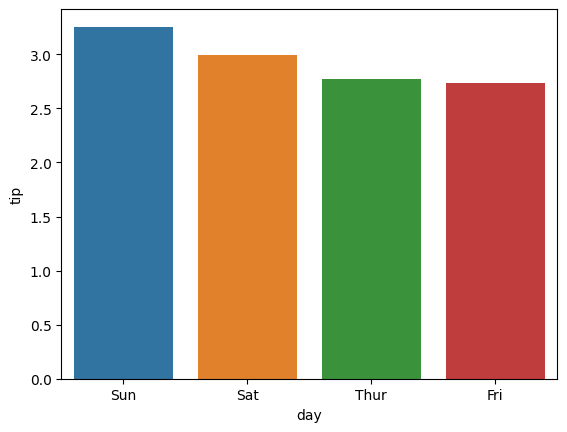

In [47]:

sns.barplot(data=avg_tip_per_day_df, x="day", y="tip")

#plt.ylim(0.14, 0.18)

## Preliminary result

The average tip differs by day, but the reason for that can be manifold, for example, a larger total bill might drive up the tip.

In [48]:
tips_df["perc_tip"] = tips_df.tip / tips_df.total_bill
tips_df.head(1)

,total_bill,tip,sex,smoker,day,time,size,perc_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447


In [49]:
avg_per_tip_df = tips_df.groupby("day")["perc_tip"].mean().to_frame().reset_index()
avg_per_tip_df.columns = ["day", "avg_perc_tip"]
avg_per_tip_df.sort_values("avg_perc_tip", ascending=False, inplace=True)

<Axes: xlabel='day', ylabel='avg_perc_tip'>

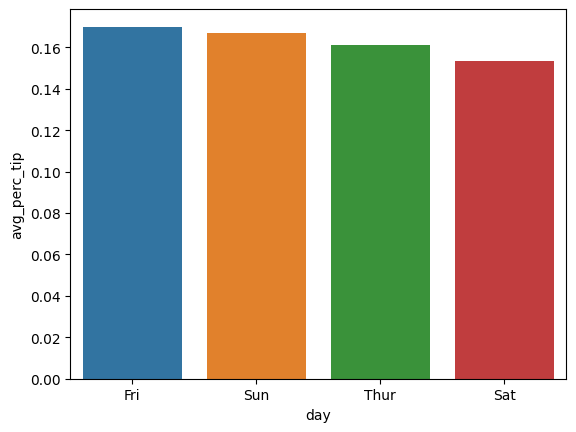

In [50]:
sns.barplot(data=avg_per_tip_df, x="day", y="avg_perc_tip")

While the Average tip is the largest on Sundays, we observe largest average percentage tip on Fridays.

<Axes: xlabel='day', ylabel='perc_tip'>

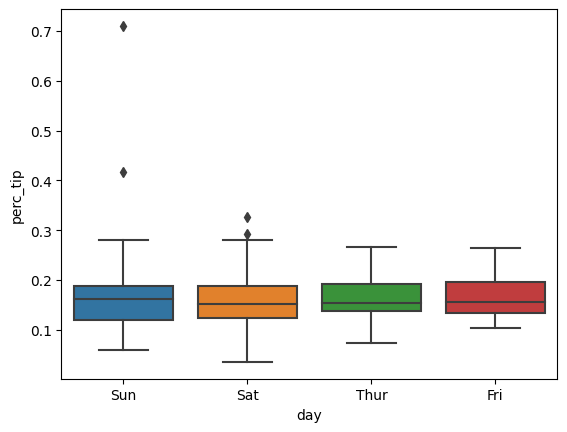

In [51]:
sns.boxplot(data=tips_df, x ="day", y="perc_tip")

There is an outlier in the data, a person payin  a +70% tip.


In [52]:
tips_df[tips_df.perc_tip > 0.7]

,total_bill,tip,sex,smoker,day,time,size,perc_tip
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


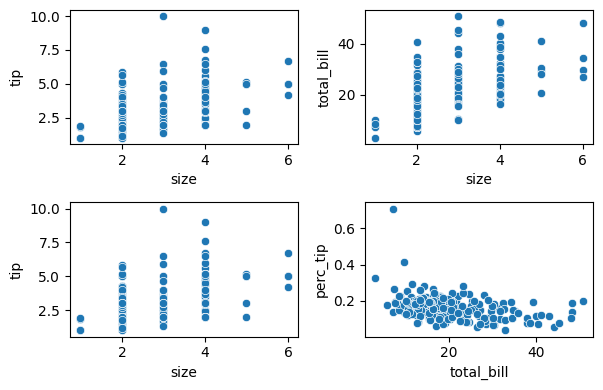

In [54]:
fig, ax = plt.subplots(2,2, figsize=(6,4))
sns.scatterplot(data=tips_df, x="size", y="tip",ax=ax[0,0])
sns.scatterplot(data=tips_df, x="size", y="total_bill" , ax=ax[0,1])

sns.scatterplot(data=tips_df, x="size", y="tip",ax=ax[1,0])
sns.scatterplot(data=tips_df, x="total_bill", y="perc_tip" , ax=ax[1,1])

plt.tight_layout()
plt.show()

In [62]:
tips_df_wo_outlier = tips_df[tips_df.perc_tip< 0.7]

np.corrcoef(tips_df["total_bill"], tips_df["perc_tip"])

array([[ 1.        , -0.33862408],
       [-0.33862408,  1.        ]])

In [63]:
np.corrcoef(tips_df_wo_outlier["total_bill"], tips_df_wo_outlier["perc_tip"])

array([[ 1.        , -0.35237606],
       [-0.35237606,  1.        ]])

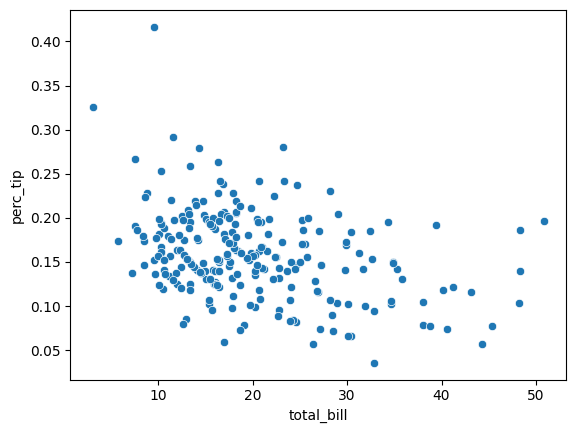

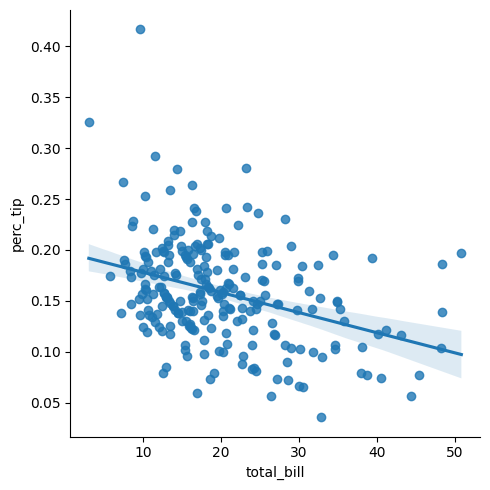

In [69]:
sns.scatterplot(data=tips_df_wo_outlier, x="total_bill", y="perc_tip")

sns.lmplot(data=tips_df_wo_outlier, x="total_bill", y="perc_tip")

In [70]:
fig, ax =plt.subplot(1.2)

sns.lmplot(data=tips_df_wo_outlier, x="total_bill", y="perc_tip")

ValueError: ignored

<Figure size 640x480 with 0 Axes>